# Handwritten Digits Recognation 
- using Tensorflow and keras

In [29]:
import tensorflow as tf
from tensorflow import keras

In [3]:
#pip install --upgrade tensorflow keras

In [16]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [17]:
len(X_train)#digits pic

60000

In [18]:
len(X_test)

10000

In [19]:
X_train[0].shape # pixel img 

(28, 28)

In [44]:
X_train[0] # pixels

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

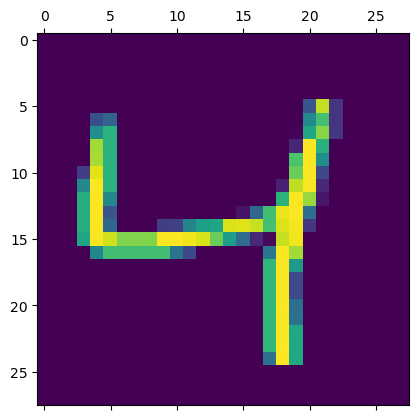

In [21]:
import matplotlib.pyplot as plt 
plt.matshow(X_train[2])

In [22]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [23]:
X_train.shape

(60000, 28, 28)

In [37]:
# scaling for better accuracy 
X_train = X_train/255
X_test = X_test/255

In [38]:
# flaten 1 dim >> 2 dim
X_train_flattened =X_train.reshape(len(X_train),28*28)


In [39]:
X_test_flattened =X_test.reshape(len(X_test),28*28)

In [40]:
X_train_flattened.shape

(60000, 784)

# Create Neural Network

In [41]:
import tensorflow as tf

model = tf.keras.Sequential([  #output 10 input 784 
    tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


C:\Users\yluja\Documents\adult.csv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# optimizer 
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8034 - loss: 0.7316
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9146 - loss: 0.3084
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9193 - loss: 0.2856
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9242 - loss: 0.2711
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9248 - loss: 0.2663


In [46]:
# accuracy on test dataset
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9120 - loss: 0.3048


[0.2703893184661865, 0.9239000082015991]

In [47]:
# prediction
model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.76136957e-02, 3.93100606e-07, 5.91066480e-02, ...,
        9.99815226e-01, 8.37984905e-02, 6.00819707e-01],
       [4.12647188e-01, 4.25536465e-03, 9.99130607e-01, ...,
        4.61886334e-13, 1.09544039e-01, 1.76552872e-09],
       [6.47764013e-04, 9.93830323e-01, 6.91125035e-01, ...,
        1.30623743e-01, 3.99860680e-01, 4.43446152e-02],
       ...,
       [8.25008010e-06, 7.85504380e-06, 1.34973950e-03, ...,
        3.06915075e-01, 5.28032720e-01, 7.16309071e-01],
       [1.73622262e-04, 2.34989697e-04, 1.75379333e-04, ...,
        5.12706065e-05, 6.46515310e-01, 1.04611674e-04],
       [1.28012644e-02, 2.66687672e-10, 1.13511033e-01, ...,
        1.23475470e-08, 1.28742657e-04, 2.93048430e-07]], dtype=float32)

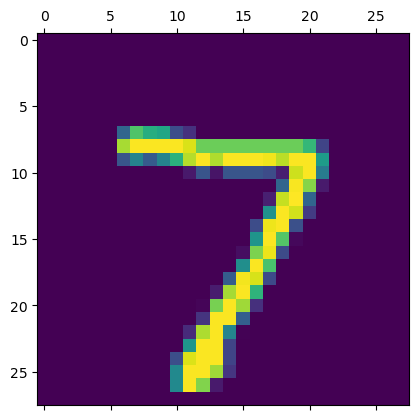

In [48]:
plt.matshow(X_test[0])

In [49]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [50]:
y_predicted[0]

array([2.7613696e-02, 3.9310061e-07, 5.9106648e-02, 9.5175242e-01,
       3.2570066e-03, 1.0889305e-01, 1.1941680e-06, 9.9981523e-01,
       8.3798490e-02, 6.0081971e-01], dtype=float32)

In [52]:
import numpy as np
np.argmax(y_predicted[0])# which is correct 

7

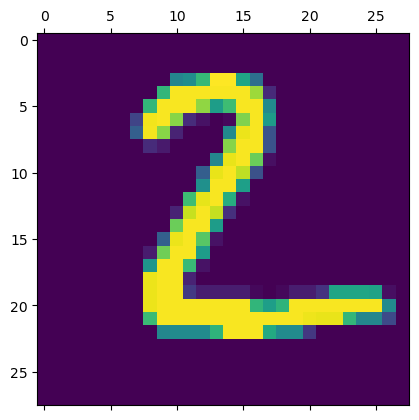

In [54]:
plt.matshow(X_test[1])

In [56]:
y_predicted[1]

array([4.1264719e-01, 4.2553646e-03, 9.9913061e-01, 3.3650631e-01,
       5.2956411e-10, 7.8894085e-01, 8.0008215e-01, 4.6188633e-13,
       1.0954404e-01, 1.7655287e-09], dtype=float32)

In [57]:
np.argmax(y_predicted[1])

2

In [59]:
y_test[:5] 

array([7, 2, 1, 0, 4], dtype=uint8)

In [62]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5] # matching

[7, 2, 1, 0, 4]

In [63]:
tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   9,   10,  923,   16,   10,    3,   12,   10,   36,    3],
       [   4,    0,   19,  926,    1,   22,    2,   11,   19,    6],
       [   2,    1,    4,    1,  936,    0,    7,    3,   10,   18],
       [  11,    3,    2,   32,   13,  778,   15,    5,   29,    4],
       [  14,    3,    6,    1,    8,   13,  909,    2,    2,    0],
       [   2,    6,   21,    8,   10,    0,    0,  955,    3,   23],
       [  10,   11,    6,   21,    9,   33,    9,   14,  856,    5],
       [  12,    7,    1,   11,   58,    8,    0,   33,    6,  873]])>

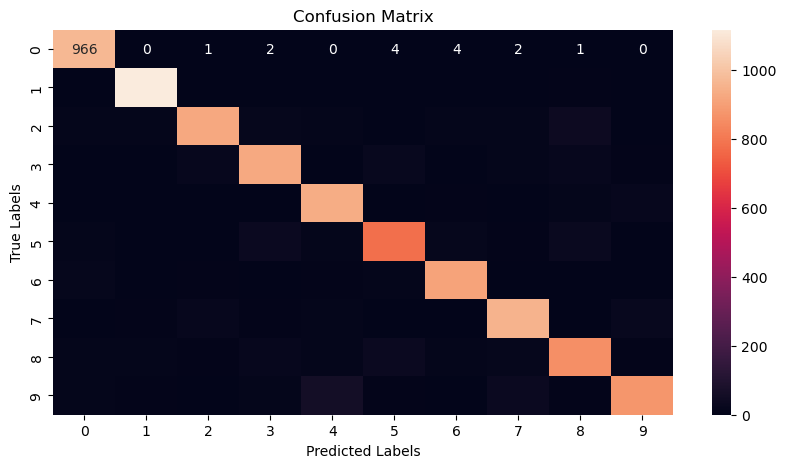

In [81]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


# Compute confusion matrix
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [64]:
# add hidden layer >> improve the accuracy 
model = tf.keras.Sequential([  #output 10 input 784 
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
# optimizer 
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

C:\Users\yluja\Documents\adult.csv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8714 - loss: 0.4565
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9644 - loss: 0.1222
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9740 - loss: 0.0870
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9802 - loss: 0.0653
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9852 - loss: 0.0492


In [65]:
# accuracy on test dataset
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0890


[0.07764765620231628, 0.975600004196167]

In [92]:
# dont want to do flatten ther is a layer do it 
model = tf.keras.Sequential([  #output 10 input 784 
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [93]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5) # without flattend X_train

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8733 - loss: 0.4557
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9617 - loss: 0.1264
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9745 - loss: 0.0836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9807 - loss: 0.0635
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9862 - loss: 0.0457


In [95]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9699 - loss: 0.1002


[0.08295107632875443, 0.9747999906539917]